## <font color='blue'>Engenharia de Software Para Machine Learning</font>
## <font color='blue'>Projeto 1</font>
## <font color='blue'>Construção de Aplicação Web e Integração com Machine Learning</font>

In [1]:
!pip install -q -U watermark
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
# Imports
import sklearn
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
%reload_ext watermark
%watermark -a "Mateus Marques"

Author: Mateus Marques



## Carregando os Dados

In [4]:
# Carrega o dataset
df_dsa = pd.read_csv("dataset.csv")

In [5]:
# Shape
df_dsa.shape

(64461, 61)

In [6]:
# Visualiza amostra dos dados
df_dsa.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


## Engenharia de Atributos e Limpeza de Dados

Nosso objetivo é prever o salário de um profissional de tecnologia. Vamos trabalhar com algumas variáveis preditoras e a variável alvo será ConvertedComp (compensação financeira).

In [7]:
# Vamos trabalhar somente com algumas variáveis
df = df_dsa[["Country", "DevType", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]

In [8]:
# Ajustamos o nome de uma das variáveis
df = df.rename({"ConvertedComp": "Salary"}, axis = 1)

In [9]:
# Amostra dos dados
df.head()

,Country,DevType,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [10]:
# Amostra dos dados
df.tail()

,Country,DevType,EdLevel,YearsCodePro,Employment,Salary
64456,United States,Senior executive/VP,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Less than 1 year,Employed full-time,NaN
64457,Morocco,NaN,NaN,NaN,Employed full-time,NaN
64458,Viet Nam,NaN,Primary/elementary school,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,Employed full-time,NaN
64460,Spain,NaN,"Other doctoral degree (Ph.D., Ed.D., etc.)",NaN,Employed full-time,NaN


In [11]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       64072 non-null  object 
 1   DevType       49370 non-null  object 
 2   EdLevel       57431 non-null  object 
 3   YearsCodePro  46349 non-null  object 
 4   Employment    63854 non-null  object 
 5   Salary        34756 non-null  float64
dtypes: float64(1), object(5)
memory usage: 3.0+ MB


In [12]:
# Filtramos os dados mantendo somente valores não nulos
df = df[df["Salary"].notnull()]

In [13]:
# Algumas variáveis apresentam valores ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34756 entries, 7 to 64154
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   DevType       34367 non-null  object 
 2   EdLevel       34188 non-null  object 
 3   YearsCodePro  34621 non-null  object 
 4   Employment    34717 non-null  object 
 5   Salary        34756 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.9+ MB


In [14]:
# Eliminamos registros com valores ausentes
df = df.dropna()

In [15]:
# Problema resolvido
df.isnull().sum()

Country         0
DevType         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [16]:
# Valores únicos da variável categórica
df['Employment'].unique()

array(['Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed part-time'], dtype=object)

In [17]:
# Conta os registros por categoria
df['Employment'].value_counts()

Employment
Employed full-time                                      29722
Independent contractor, freelancer, or self-employed     2977
Employed part-time                                        997
Name: count, dtype: int64

In [18]:
# Vamos manter somente os registros de quem trabalha full-time
df = df[df["Employment"] == "Employed full-time"]

In [19]:
df.head()

,Country,DevType,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Database administrator;Developer, full-stack;D...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,"Designer;Developer, front-end",Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Designer;Developer, back-end","Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [20]:
# Não precisamos mais desta variável pois agora ela é de fato uma constante
df = df.drop("Employment", axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29722 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       29722 non-null  object 
 1   DevType       29722 non-null  object 
 2   EdLevel       29722 non-null  object 
 3   YearsCodePro  29722 non-null  object 
 4   Salary        29722 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


In [22]:
# Valores únicos da variável
df['DevType'].unique()

array(['Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics',
       'Database administrator;Developer, full-stack;Developer, mobile',
       'Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end',
       ...,
       'Developer, back-end;Developer, front-end;Developer, full-stack;DevOps specialist;Engineer, data;Engineering manager',
       'Database administrator;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Engineer, data;Engineering manager;System administrator',
       'Developer, full-stack;Developer, QA or test;System administrator'],
      dtype=object)

In [23]:
# Vamos converter a variável em uma lista fazendo split por ;
df['DevType'] = df['DevType'].str.split(";")

In [24]:
# Buscamos o primeiro elemento da lista
df['DevType'] = df['DevType'].str[0]

In [25]:
# Valores únicos
len(df['DevType'].unique())

23

In [26]:
# Contagem de registros por categoria
df['DevType'].value_counts()

DevType
Developer, back-end                              11763
Developer, full-stack                             3849
Database administrator                            2155
Developer, front-end                              1997
Data or business analyst                          1870
Academic researcher                               1769
Designer                                          1438
Developer, desktop or enterprise applications     1324
Data scientist or machine learning specialist     1142
Developer, mobile                                  826
Developer, embedded applications or devices        526
DevOps specialist                                  255
Developer, QA or test                              204
Engineer, data                                     129
Engineering manager                                114
Developer, game or graphics                        104
System administrator                                72
Engineer, site reliability                          47
Se

In [27]:
# Definição da função que recebe duas entradas: 'categories', que é uma série de dados categóricos, 
# e 'cutoff', que é um limite numérico
def dsa_reduz_categorias(categories, cutoff):
    
    # Inicializa um dicionário vazio para mapear as categorias
    categorical_map = {}
    
    # Inicia um loop que percorre todos os elementos da série 'categories'
    for i in range(len(categories)):
        
        # Verifica se o valor da categoria atual é maior ou igual ao limite (cutoff).
        if categories.values[i] >= cutoff:
            
            # Se verdadeiro, mapeia a categoria para ela mesma no dicionário.
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            
            # Se falso, mapeia a categoria para 'Other'.
            categorical_map[categories.index[i]] = 'Other'
    
    # Após o loop, retorna o dicionário com o mapeamento das categorias.
    return categorical_map

In [28]:
# Aplica a função filtrando categorias com mais de 100 registros
dev_map = dsa_reduz_categorias(df['DevType'].value_counts(), 100)

In [29]:
# Agora mapeamos o item anterior ao valor atual da variável e salvamos na própria variável
df['DevType'] = df['DevType'].map(dev_map)

In [30]:
# Registros por categoria
df['DevType'].value_counts()

DevType
Developer, back-end                              11763
Developer, full-stack                             3849
Database administrator                            2155
Developer, front-end                              1997
Data or business analyst                          1870
Academic researcher                               1769
Designer                                          1438
Developer, desktop or enterprise applications     1324
Data scientist or machine learning specialist     1142
Developer, mobile                                  826
Developer, embedded applications or devices        526
Other                                              257
DevOps specialist                                  255
Developer, QA or test                              204
Engineer, data                                     129
Engineering manager                                114
Developer, game or graphics                        104
Name: count, dtype: int64

In [31]:
# Registros por categoria
df['Country'].value_counts()

Country
United States     7468
India             2409
United Kingdom    2247
Germany           1891
Canada            1161
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: count, Length: 154, dtype: int64

In [32]:
# Criamos o mapeamento filtrando categorias com mais 400 registros
country_map = dsa_reduz_categorias(df.Country.value_counts(), 400)

In [33]:
# Aplicamos o mapeamento
df['Country'] = df['Country'].map(country_map)

In [34]:
# Registros por categoria
df.Country.value_counts()

Country
Other                 8482
United States         7468
India                 2409
United Kingdom        2247
Germany               1891
Canada                1161
Brazil                 985
France                 966
Spain                  666
Australia              650
Netherlands            648
Poland                 564
Italy                  556
Russian Federation     521
Sweden                 508
Name: count, dtype: int64

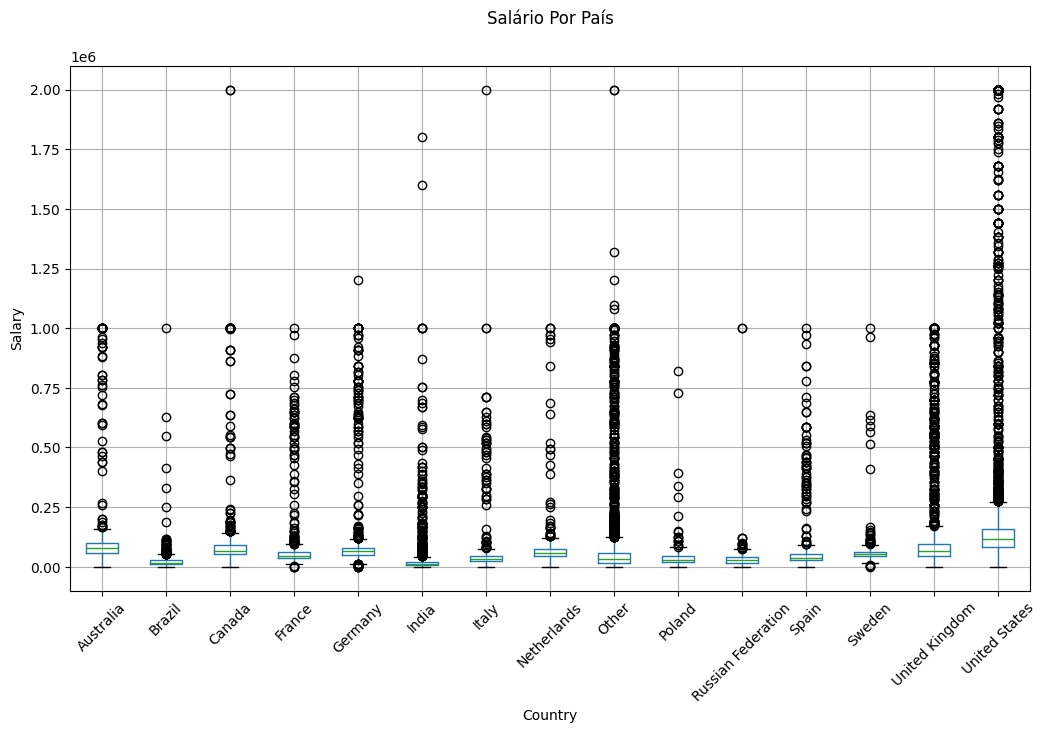

In [35]:
# Plot
fig, ax = plt.subplots(1,1, figsize = (12, 7))
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle('Salário Por País')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 45)
plt.show()

In [36]:
# Vamos aplicar mais um filtro aos dados removendo outliers e categorias do tipo "Outros"
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 5000]
df = df[df['Country'] != 'Other']
df = df[df['DevType'] != 'Other']
df = df[df['DevType'] != 'Other (please specify):']

In [37]:
df.shape

(19047, 5)

In [38]:
df.head()

,Country,DevType,EdLevel,YearsCodePro,Salary
7,United States,"Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,Database administrator,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,"Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,Designer,Some college/university study without earning ...,7,14268.0
12,Netherlands,Designer,"Secondary school (e.g. American high school, G...",20,38916.0


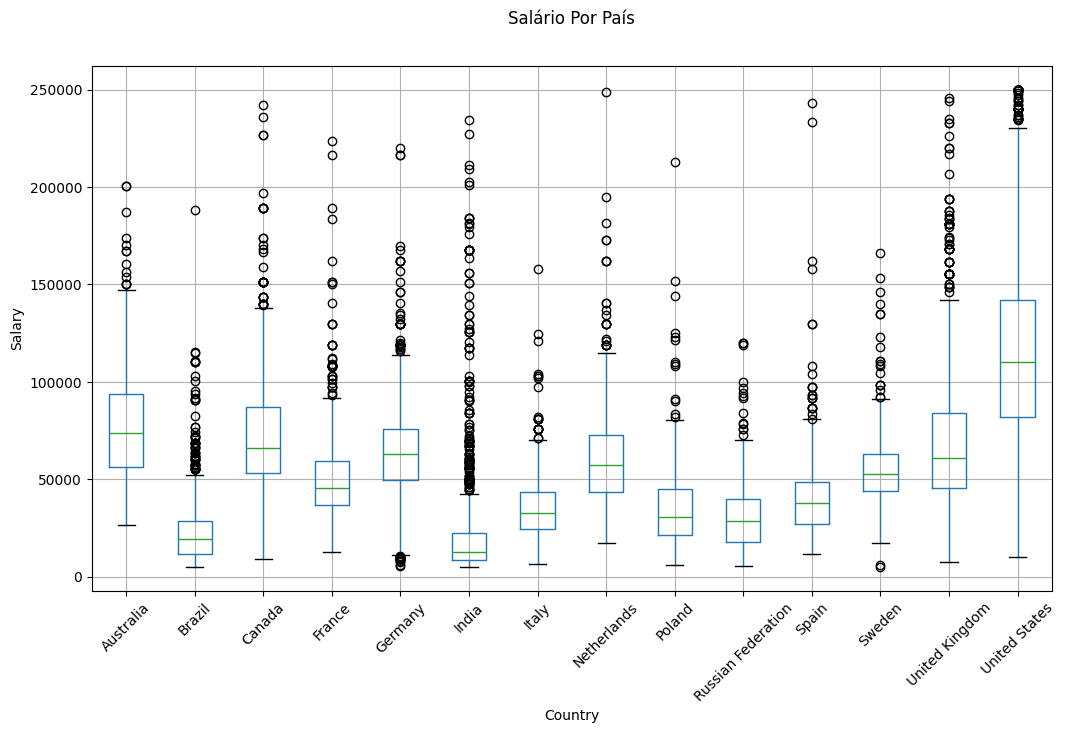

In [39]:
# Plot
fig, ax = plt.subplots(1,1, figsize = (12, 7))
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle('Salário Por País')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 45)
plt.show()

In [40]:
# Valores únicos
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [41]:
# Função para converter os valores categóricos identificados acima para valores numéricos
def dsa_ajusta_tempo_experiencia(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

In [42]:
# Aplica a função
df['YearsCodePro'] = df['YearsCodePro'].apply(dsa_ajusta_tempo_experiencia)

In [43]:
# Valores únicos
df["YearsCodePro"].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. , 29. ,  6. ,
       28. ,  8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. ,
       18. , 14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 17. , 24. ,
       34. , 35. , 33. , 36. , 40. , 39. , 50. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 49. ])

In [44]:
# Valores únicos
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [45]:
# Função para reduzir o número de categorias da variável
def dsa_ajusta_nivel_educacional(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

In [46]:
# Aplica a função
df['EdLevel'] = df['EdLevel'].apply(dsa_ajusta_nivel_educacional)

In [47]:
# Registros por categoria
df["EdLevel"].value_counts()

EdLevel
Bachelor’s degree        9592
Master’s degree          4899
Less than a Bachelors    3599
Post grad                 957
Name: count, dtype: int64

In [48]:
# Verifique periodicamente se valores ausentes surgiram durante as transformações
df.isnull().sum()

Country         0
DevType         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [49]:
df.head()

,Country,DevType,EdLevel,YearsCodePro,Salary
7,United States,"Developer, back-end",Bachelor’s degree,13.0,116000.0
9,United Kingdom,Database administrator,Master’s degree,4.0,32315.0
10,United Kingdom,"Developer, back-end",Bachelor’s degree,2.0,40070.0
11,Spain,Designer,Less than a Bachelors,7.0,14268.0
12,Netherlands,Designer,Less than a Bachelors,20.0,38916.0


In [50]:
# Mapeamento para converter a variável categórica em representação numérica
map_ed_level = {'Less than a Bachelors': 0, 
                'Bachelor’s degree': 1, 
                'Master’s degree': 2, 
                'Post grad': 3}

In [51]:
# Aplica o mapeamento
df['EdLevel'] = df['EdLevel'].map(map_ed_level)

In [52]:
# Mapeamento para converter a variável categórica em representação numérica
map_pais = {'Other': 0,  
            'United States': 1,
            'India': 2,
            'United Kingdom': 3,
            'Germany': 4,
            'Canada': 5,
            'Brazil': 6,
            'France': 7,
            'Spain': 8,
            'Australia': 9,
            'Netherlands': 10,
            'Poland': 11,
            'Italy': 12,
            'Russian Federation': 13,
            'Sweden': 14 }

In [53]:
# Aplica o mapeamento
df['Country'] = df['Country'].map(map_pais)

In [54]:
# Mapeamento para converter a variável categórica em representação numérica
map_dev_type = {'Developer, back-end': 0,
                'Developer, full-stack': 1,
                'Database administrator': 2,
                'Developer, front-end': 3, 
                'Data or business analyst': 4,
                'Academic researcher': 5,
                'Designer': 6,
                'Developer, desktop or enterprise applications': 7,
                'Data scientist or machine learning specialist': 8,
                'Developer, mobile': 9,
                'Developer, embedded applications or devices': 10,
                'Other': 11,
                'DevOps specialist': 12,
                'Developer, QA or test': 13,
                'Engineer, data': 14,
                'Engineering manager': 15,
                'Developer, game or graphics': 16}

In [55]:
# Aplica o mapeamento
df['DevType'] = df['DevType'].map(map_dev_type)

In [56]:
# Verifique periodicamente se valores ausentes surgiram durante as transformações
df.isnull().sum()

Country         0
DevType         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [57]:
df.head()

,Country,DevType,EdLevel,YearsCodePro,Salary
7,1,0,1,13.0,116000.0
9,3,2,2,4.0,32315.0
10,3,0,1,2.0,40070.0
11,8,6,0,7.0,14268.0
12,10,6,0,20.0,38916.0


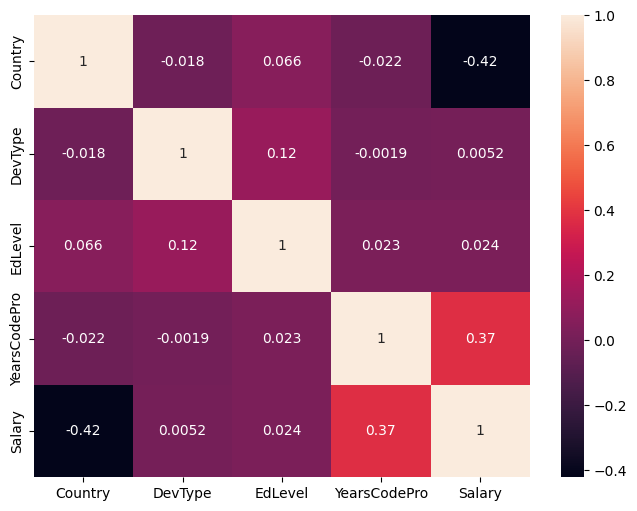

In [58]:
# Mapa de Correlação
plt.figure(figsize = (8,6))
corr = df.corr()
sns.heatmap(corr, annot = True);

## Pré-Processamento dos Dados

In [59]:
# Separamos X e y
X = df.drop("Salary", axis = 1)
y = df["Salary"]

In [60]:
# Divisão em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
# print the shape of the training and testing datasets
print(f"Shape de X_treino :{X_treino.shape}\nShape de X_teste: {X_teste.shape}",
      f"\nShape de y_treino: {y_treino.shape}\nShape de y_teste: {y_teste.shape}")

Shape de X_treino :(15237, 4)
Shape de X_teste: (3810, 4) 
Shape de y_treino: (15237,)
Shape de y_teste: (3810,)


In [62]:
# Cria o padronizador
scaler = StandardScaler()

In [63]:
# Fit e transform somente em treino
X_treino_scaled = scaler.fit_transform(X_treino)

In [64]:
# Transform em teste (e em novos dados)
X_teste_scaled = scaler.transform(X_teste)

In [65]:
# Salva o padronizador pois será usado na app
pickle.dump(scaler, open('dsa_scaler.pkl','wb'))

In [66]:
X_treino_scaled

array([[-0.87563519, -0.51026172, -0.21064541, -0.88242237],
       [-0.35240715, -0.51026172, -0.21064541,  0.30086836],
       [-0.87563519, -0.51026172, -0.21064541, -1.07963749],
       ...,
       [-0.09079313, -0.80479739, -1.48278339, -0.75094562],
       [-0.35240715,  0.37334526, -0.21064541, -0.88242237],
       [ 2.26373304,  1.25695225, -0.21064541, -1.01389912]])

In [67]:
X_teste_scaled

array([[ 1.47889098, -0.80479739, -0.21064541,  0.56382186],
       [-0.35240715, -0.21572606, -1.48278339,  0.16939162],
       [ 2.26373304,  1.55148791,  1.06149257,  0.03791487],
       ...,
       [-0.87563519,  1.55148791,  1.06149257,  3.06188007],
       [-0.35240715, -0.80479739, -0.21064541, -0.48799212],
       [-0.87563519,  0.0788096 ,  1.06149257, -0.75094562]])

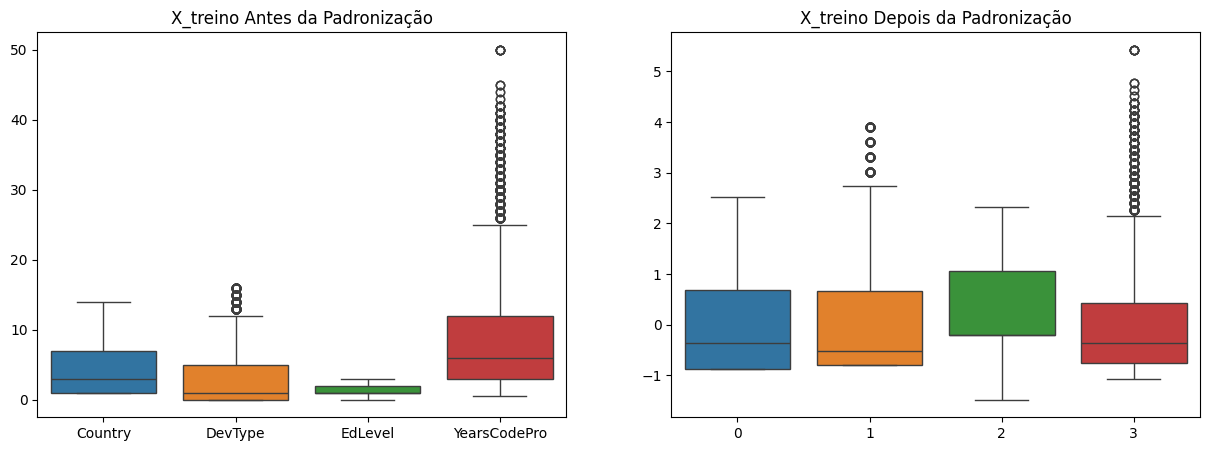

In [68]:
# Cria uma figura e um conjunto de subplots.
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

# Primeiro subplot para X_train antes da padronização
sns.boxplot(data = X_treino, ax = ax[0])
ax[0].set_title('X_treino Antes da Padronização')

# Segundo subplot para X_treino após a padronização
sns.boxplot(data = X_treino_scaled, ax = ax[1])
ax[1].set_title('X_treino Depois da Padronização')

plt.show()

<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
## Modelagem Preditiva

### Versão 1 do Modelo

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [69]:
# Cria o modelo
modelo_dsa_v1 = LinearRegression()

In [70]:
# Treina o modelo
modelo_dsa_v1.fit(X_treino_scaled, y_treino)

LinearRegression()

In [71]:
# Coeficientes aprendidos durante o treinamento
print(modelo_dsa_v1.coef_)
print(modelo_dsa_v1.intercept_)

[-20402.41186609   -232.77432071   2246.52853994  18010.15670058]
73154.83034718121


In [72]:
# Hiperparâmetros do modelo
modelo_dsa_v1.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [73]:
# Faz previsões
y_pred_v1 = modelo_dsa_v1.predict(X_teste_scaled)

In [74]:
# Métricas
print('Mean Absolute Error (MAE):', round(mean_absolute_error(y_teste, y_pred_v1),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(mean_squared_error(y_teste, y_pred_v1)),3))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(mean_squared_error(y_teste, y_pred_v1))),3))
print('R2 Score:', round(r2_score(y_teste, y_pred_v1),6))

Mean Absolute Error (MAE): 30712.73
Root Mean Squared Error (RMSE): 40984.106
Root Mean Squared Log Error (RMSLE): 10.621
R2 Score: 0.288011


### Versão 2 do Modelo

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [75]:
# Cria o modelo
modelo_dsa_v2 = DecisionTreeRegressor(random_state = 1)

In [76]:
# Treina o modelo
modelo_dsa_v2.fit(X_treino_scaled, y_treino)

DecisionTreeRegressor(random_state=1)

In [77]:
# Faz previsões
y_pred_v2 = modelo_dsa_v2.predict(X_teste_scaled)

In [78]:
# Métricas
print('Mean Absolute Error (MAE):', round(mean_absolute_error(y_teste, y_pred_v2),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(mean_squared_error(y_teste, y_pred_v2)),3))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(mean_squared_error(y_teste, y_pred_v2))),3))
print('R2 Score:', round(r2_score(y_teste, y_pred_v2),6))

Mean Absolute Error (MAE): 23568.01
Root Mean Squared Error (RMSE): 34910.672
Root Mean Squared Log Error (RMSLE): 10.461
R2 Score: 0.483395


### Versão 3 do Modelo

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [79]:
# Cria o modelo
modelo_dsa_v3 = RandomForestRegressor(random_state = 1)

In [80]:
# Treina o modelo
modelo_dsa_v3.fit(X_treino_scaled, y_treino)

RandomForestRegressor(random_state=1)

In [81]:
# Faz previsões
y_pred_v3 = modelo_dsa_v3.predict(X_teste_scaled)

In [82]:
# Métricas
print('Mean Absolute Error (MAE):', round(mean_absolute_error(y_teste, y_pred_v3),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(mean_squared_error(y_teste, y_pred_v3)),3))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(mean_squared_error(y_teste, y_pred_v3))),3))
print('R2 Score:', round(r2_score(y_teste, y_pred_v3),6))

Mean Absolute Error (MAE): 21929.343
Root Mean Squared Error (RMSE): 32286.531
Root Mean Squared Log Error (RMSLE): 10.382
R2 Score: 0.55814


<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
### Otimização de Hiperparâmetros

In [83]:
# Grid de hiperparâmetros para otimizar o modelo
max_depth = [None,6,8,10,12]
n_estimators = [100,200,300]
min_samples_leaf = [2,3,4,5]
parameters = {"max_depth": max_depth, "n_estimators": n_estimators, "min_samples_leaf": min_samples_leaf}

In [84]:
# Cria o modelo
modelo_dsa = RandomForestRegressor(random_state = 1)

In [85]:
# Cria o Grid Search
grid_search_dsa = GridSearchCV(modelo_dsa, parameters, scoring = 'neg_mean_squared_error')

Treinamos o Grid Search buscando a melhor combinação de hiperparâmetros.

In [86]:
%%time
grid_search_dsa.fit(X_treino_scaled, y_treino)

CPU times: total: 7min 34s
Wall time: 7min 43s


GridSearchCV(estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [None, 6, 8, 10, 12],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [87]:
# O modelo final é o melhor estimador encontrado pelo Grid Search
modelo_dsa = grid_search_dsa.best_estimator_

In [88]:
# Treina o melhor estimador
modelo_dsa.fit(X_treino_scaled, y_treino)

RandomForestRegressor(max_depth=8, min_samples_leaf=5, n_estimators=300,
                      random_state=1)

In [89]:
# Faz previsões
y_pred = modelo_dsa.predict(X_teste_scaled)

In [90]:
# Métricas
print('Mean Absolute Error (MAE):', round(mean_absolute_error(y_teste, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(mean_squared_error(y_teste, y_pred)),3))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(mean_squared_error(y_teste, y_pred))),3))
print('R2 Score:', round(r2_score(y_teste, y_pred),6))

Mean Absolute Error (MAE): 20265.022
Root Mean Squared Error (RMSE): 29916.626
Root Mean Squared Log Error (RMSLE): 10.306
R2 Score: 0.620626


## Testando o Modelo Antes do Deploy

In [91]:
# Vamos gerar novos dados para testar o modelo antes do deploy
novos_dados = np.array([["United States", 'Master’s degree', 'Developer, full-stack', 15]])
novos_dados

array([['United States', 'Master’s degree', 'Developer, full-stack',
        '15']], dtype='<U21')

In [92]:
# Extrai o mapeamento
country_mapping = {country: i for i, country in enumerate(np.unique(novos_dados[:, 0]))}
education_mapping = {education: i for i, education in enumerate(np.unique(novos_dados[:, 1]))}
devtype_mapping = {devtype: i for i, devtype in enumerate(np.unique(novos_dados[:, 2]))}

In [93]:
# Vetoriza X após aplicar o mapeamento às variáveis categóricas
novos_dados[:, 0] = np.vectorize(country_mapping.get)(novos_dados[:, 0])
novos_dados[:, 1] = np.vectorize(education_mapping.get)(novos_dados[:, 1])
novos_dados[:, 2] = np.vectorize(devtype_mapping.get)(novos_dados[:, 2])

In [94]:
# Converte a matriz para float a fim de aumentar a precisão
novos_dados = novos_dados.astype(float)

In [95]:
print(novos_dados)

[[ 0.  0.  0. 15.]]


In [96]:
# Transform em novos dados
novos_dados_scaled = scaler.transform(novos_dados)

In [97]:
print(novos_dados_scaled)

[[-1.1372492  -0.80479739 -1.48278339  0.82677536]]


In [98]:
# Previsão do salário com o modelo
y_pred = modelo_dsa.predict(novos_dados_scaled)

In [99]:
print(y_pred)

[136289.3620427]


In [100]:
# Modelo final para salvar em disco e seguir para o deploy
# Salvamos também o mapeamento
modelo_dsa_final = {"model": modelo_dsa, 
                    "country_mapping": country_mapping, 
                    "education_mapping": education_mapping, 
                    "devtype_mapping":devtype_mapping}

In [101]:
# Salva o modelo em disco
with open('dsa_modelo.pkl', 'wb') as file:
    pickle.dump(modelo_dsa_final, file)

In [102]:
# Carrega o modelo para verificar se está funcionando
with open('dsa_modelo.pkl', 'rb') as file:
    modelo_versao_final = pickle.load(file)

In [103]:
# Carrega o padronizador para verificar se está funcionando
with open('dsa_scaler.pkl', 'rb') as file:
    scaler_versao_final = pickle.load(file)

In [104]:
# Extrai os componentes do arquivo
modelo_carregado = modelo_versao_final["model"]
country_mapping = modelo_versao_final["country_mapping"]
education_mapping = modelo_versao_final["education_mapping"]
devtype_mapping  = modelo_versao_final['devtype_mapping']

In [105]:
# Transform em novos dados
novos_dados_scaled = scaler_versao_final.transform(novos_dados)

In [106]:
# Faz previsão com o modelo carregado do disco
y_pred = modelo_carregado.predict(novos_dados_scaled)

In [107]:
print(y_pred)

[136289.3620427]


In [108]:
%watermark -a "Mateus Marques"

Author: Mateus Marques



Retire os comentários das células abaixo e execute para checar as versões dos pacotes na sua máquina.

In [109]:
%watermark -v -m

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.22.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [110]:
%watermark --iversions

sklearn   : 1.4.2
seaborn   : 0.13.2
pandas    : 2.2.2
numpy     : 1.26.4
matplotlib: 3.8.4



# Fim